Decision score for predicting image 'some_digit' to a class is: [2164.22030239]
Predicted class of 'some_digit' is: [False]
----------------------------------------


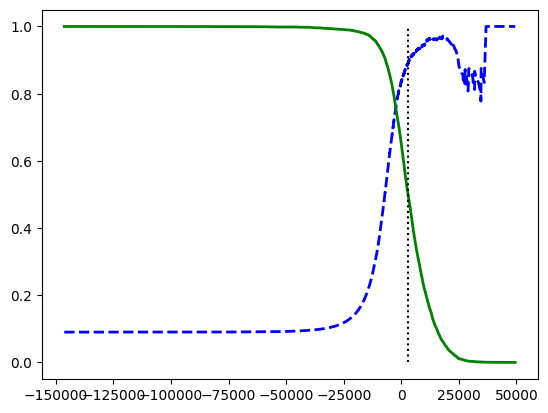

In [9]:
'''
Thresholding in classification, is about fine-tuning that decision boundary (threshold) to get the balance
b/w precison and recall based on our use-case/problem. NOTE: Thresholding should be done on an imperfect model
if we want it to classify instances of positive class with high precision, or if we want it to have high recall
on instances of positive class.

NOTE: If we want more recall, the precision of the model decreases (as it will consider false positives, hence
reducing its confidence). If we want more precision, the recall of the model decreases

Thresholding is not needed for a perfect model as it can classify with 100% accuracy, precision, recall and F1 score
(TP = total no.of actual instances of positive class, FP = 0, TN = total no.of actual instances of negative class,
FN = 0). But this is hypothetical as no model can achieve this in reality, because the real-world data is diverse and
provided the dataset is sampled from it and represents the real-world data.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
  plt.show()

if __name__ == "__main__":

  mnist = fetch_openml('mnist_784', as_frame=False)
  X, Y = mnist.data, mnist.target
  X_train, Y_train, X_test, Y_test = X[:60000], Y[:60000], X[60000:], Y[60000:]

  Y_train_5 = (Y_train == '5') # Need target labels with '5' from labels of training set
  #print(Y_train_5)
  Y_test_5 = (Y_test == '5') # Need target labels with '5' from labels of test set

  model = SGDClassifier(random_state=42)

  model.fit(X_train, Y_train_5) # Training model to classify images b/w '5' and 'non 5'

  # Using k-fold cross validation to get the model's decision scores of all the instances in the training set
  '''
  Scikit-learn does not let you set the threshold directly, but it does give you decision scores that the model uses to make
  predictions.

  Let us get the decision score used for the model's prediction of an image of '5' in the class of '5s' (positive class)
  to understand whether the model's precision on that image (confidence in predicting this particular image of '5' as
  class '5') increases as we increase the threshold, and to understand whether the model's recall (assurance that
  the correctly classified image of '5' actually belongs to the positive class) decreases as we increase the threshold,
  and vice-versa.

  Another way of saying it: Let us get the decision score for the model's prediction of an image of '5' (positive class).
  As we increase the decision threshold, the model becomes more conservative and only classifies highly confident cases
  as '5', leading to higher precision (fewer false positives), but potentially lower recall (more false negatives).
  Conversely, lowering the threshold increases recall but may reduce precision.

  NOTE: In this sentence, "classifies highly confident cases as '5'" doesn't necessarily mean that they are indeed
  true positives...Sometimes the model might be overconfident & confuse in classifying a 'non-5' images as '5s'
  (false positives), we would only know they are indeed true positives, if the recall is high wrt positive class ('5s').
  Increaseing the threshold, leads to higher precision (reducing false positives), but this can cause the model to consider
  confident cases of '5's, and may lead to false negatives...

  '''
  some_digit = X_train[0] #first image in the loaded MNIST dataset is an image of 5 :), verify by print(Y_train[0])
  y_score = model.decision_function([some_digit])
  print("Decision score for predicting image 'some_digit' to a class is:", y_score)

  #threshold = 0 # SGDClassifer uses a threshold equal to 0, so it returns the same prediction as the predict()
  #y_some_digit_pred = (y_score > threshold)

  threshold = 3000 # taken randomly
  y_some_digit_pred = (y_score > threshold)
  print("Predicted class of 'some_digit' is:", y_some_digit_pred) #[False] because increasing the threshold caused the recall to lower even though some_digit was an image of 5

  print("-" * 40)

  # Using k-fold cross validation to get decision scores for all the instances in the training set
  y_scores = cross_val_predict(model, X_train, Y_train_5, cv=3, method="decision_function")
  # NOTE cross_val_score() will return the accuracy in each fold, cross_val_predict() will return the decision scores for each instance in each fold

  # Now using the decision scores of all the instances, we can plot the precision and recall trade-off curve of the model trained on
  # X_train instances, with possible thresholds
  precisions, recalls, thresholds = precision_recall_curve(Y_train_5, y_scores)
  plot_precision_recall_curve(precisions, recalls, thresholds)

